# Grid data
Mickey MacKie 5/5/2022

Example of gridding data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.neighbors import LocalOutlierFactor

import GlacierStats as gs

In [2]:
df_bed = pd.read_csv('Data/Nioghalvfjerds_bed_data.csv') # download data

# remove outliers with LOF method
clf = LocalOutlierFactor(n_neighbors = 5, contamination = 0.05)
clf.fit_predict(df_bed)
lof = clf.negative_outlier_factor_
df_bed = df_bed[lof >= -1.3]

<function matplotlib.pyplot.show(close=None, block=None)>

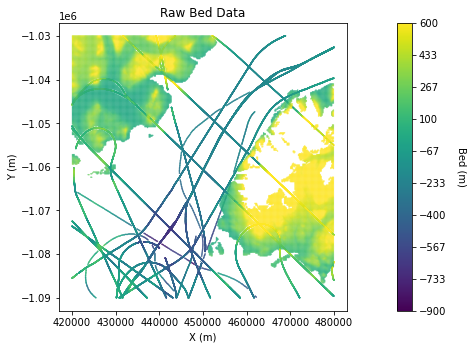

In [3]:
# plot data
im = plt.scatter(df_bed['X'],df_bed['Y'], c = df_bed['Bed'], vmin = -900, vmax = 600, marker=".", s = 0.5)       # scatter plot for location map
plt.title('Raw Bed Data')                                    # add plot title
plt.xlabel('X (m)'); plt.ylabel('Y (m)')                          # set axis labels
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-900, 600, 10)) # add vertical color bar
cbar.set_label("Bed (m)", rotation=270, labelpad=20)      # add labels to the color bar
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0) # adjust the plot size
plt.axis('scaled')
plt.show

In [4]:
# grid data
res = 500  # 500 m resolution
df_grid, grid_matrix, rows, cols = gs.grid_data(df_bed, 'X', 'Y', 'Bed', res)

Text(0.5, 1.0, 'Gridded Topography')

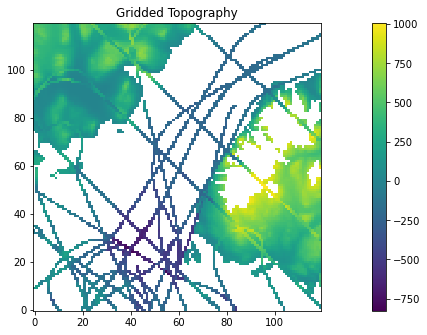

In [5]:
# plot gridded bed
c = plt.imshow(grid_matrix, cmap = 'viridis', 
               interpolation ='nearest', origin ='lower')

plt.colorbar(c)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=1) # adjust the plot size
plt.axis('scaled')

plt.title('Gridded Topography')

In [6]:
df_grid.head(25)

,X,Y,Sum,Count,Z
0,420000.0,-1090000.0,0.0000,0.0,NaN
1,420500.0,-1090000.0,0.0000,0.0,NaN
2,421000.0,-1090000.0,0.0000,0.0,NaN
3,421500.0,-1090000.0,0.0000,0.0,NaN
4,422000.0,-1090000.0,0.0000,0.0,NaN
5,422500.0,-1090000.0,0.0000,0.0,NaN
6,423000.0,-1090000.0,0.0000,0.0,NaN
7,423500.0,-1090000.0,0.0000,0.0,NaN
8,424000.0,-1090000.0,0.0000,0.0,NaN
9,424500.0,-1090000.0,0.0000,0.0,NaN
